<a href="https://colab.research.google.com/github/fblondiaux/LGBIO2072-2020/blob/TP2Antoine/LGBIO2072_TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP2 - Firing Rate
__Authors:__ Antoine de Comite and Florence Blondiaux

__Content inspired from__: Neuromatch Academy github.com/NeuromatchAcademy

Please run the cells below to initialize the notebook

In [16]:
#@title Useful libraries and functions
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def rand_syn(t,sigma = 0.1, imean = 25e-11):
    dt = t[1]-t[0]
    return imean * (1 + 0.1 * (np.sqrt(np.max(t)/dt)) * np.random.normal(0,sigma,len(t)))

def step_current(t,sigma = 0.1, imean = 25e-11):
    """
    Returns a step current, with step mean =  25e-11
    """
    i = np.zeros_like(t)
    i[int(len(t)/2):] = 1 #step
    i = i+np.random.normal(0,sigma,len(t)) 
    return imean * i

def LIF(input_current,t,  tau= 20e-3 , urest= -60e-3 , r= 100e6, ureset = -70e-3 \
               ,theta = -50e-3, t_ref = 10e-3 ): 
    """
    Authors : Antoine de Comite and Florence Blondiaux
    Simulate the LIF model in response to an external input current
    Args:
      input_current   : Vector containing the input current [A].
      t               : Vector containing the discretized time points [s]
      tau             : Membrane time constant. Default value: 20e-3 [s]
      urest           : Leak potential. Default value: -60e-3 [V]
      r               : Leak resistance. Default value: 100e6 [Ohm]
      ureset          : Reset potential. Default value: -70e-3[V]
      theta           : Firing threashold. Default value: -50e-3 [V]
      t_ref           : Refractory period. Default value: 10e-3 [S]
    Returns:
      u               : membrane potential [V]
      ts              : spike times [s]
    """
    u = np.zeros_like(input_current)
    ts = []
    dt = t[1]-t[0]
    S = np.zeros_like(input_current)
    u[0]=urest
    t_wait = 0
    for step in range(0,len(input_current)-1):
        if u[step] > theta:
            u[step]= theta / 1.2
            u[step+1] = ureset
            t_wait = t_ref/dt
            ts.append((step+1)*dt)
        elif t_wait >0:
            u[step +1] = ureset
            t_wait -=1
        else:
            u[step+1]=u[step] -dt/tau * (u[step]-urest) + r*dt/tau * input_current[step]
    return u, ts

def load_dataset():
  url = 'https://raw.githubusercontent.com/fblondiaux/LGBIO2072-2020/master/ExtraContent/Output_Current.csv'
  df = pd.read_csv(url, error_bad_lines=False)
  S = df.to_numpy()
  return S, 1e-3
def plot_data(S):
  for i in range(len(S)):
    spike_times = S[i]
    plt.scatter(np.where(S[i,:]==1),i*np.ones_like(np.where(S[i,:]==1)),facecolor='skyblue',edgecolor = "white")
    plt.xlabel('Time [mS]')
    plt.ylabel('Neuron')
import ipywidgets as widgets  # interactive display
%config InlineBackend.figure_format = 'retina'
# use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()


In [17]:
import ipywidgets as widgtest #interactive display
%config InlineBackend.figure_format = 'retina'
#use NMA plot style
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")
my_layout = widgets.Layout()

---

# Tutorials Objectives

In the last tutorial, we implemented the LIF model of the neuron in which we modelled train of spikes from continuous input current. In this tutorial we will characterise and study these spike trains and discuss the messages they convey. 


---
# Reminders
## 1. Raster plot

A *raster plot* can be used to represent spike trains from multiple neurons (or from a single neuron modelled several times) by plotting dots at spike times `i` from neuron `j` at plot height `j` It can be useful to visualise the activity of several neurons at the same time. For example if we want to represent the spike times contained in `spike_time`, we can use :
```
plt.scatter(spike_times, j*np.ones_like(spike_times))
```

![spikes plot](https://github.com/mpbrigham/colaboratory-figures/raw/master/nma/python-for-nma/spikes_plot.png)

## 2. Firing rate 

Spikes alone are not very informative. However, looking closer at the spikes train can be very informative for example while focussing at firing rate and spiking regularities.

The firing rate can be computed by convoluting a given kernel with the spike trains. Let $f_{ij=1}^{n}$ be the firing times and $S(t):=\sum_i \delta(t-t_i)$ be the spike train. The firing rate $\rho(t)$ can be computed as the convolution of the spike train $S(t)$ with a given kernel $\kappa(t)$ : 

$$
\begin{eqnarray}
\rho(t) & =& \kappa(t) * S(t) = \int_{-\infty}^{\infty} \kappa(t)S(t-s)ds
\end{eqnarray}
$$

The shape of the kernel will therefore be determining in the values of the instantaneous firing rate. 



---
# Exercises

## Exercise 1 

Model the responses of 500 neurons to a random input current and create the corresponding raster plot.

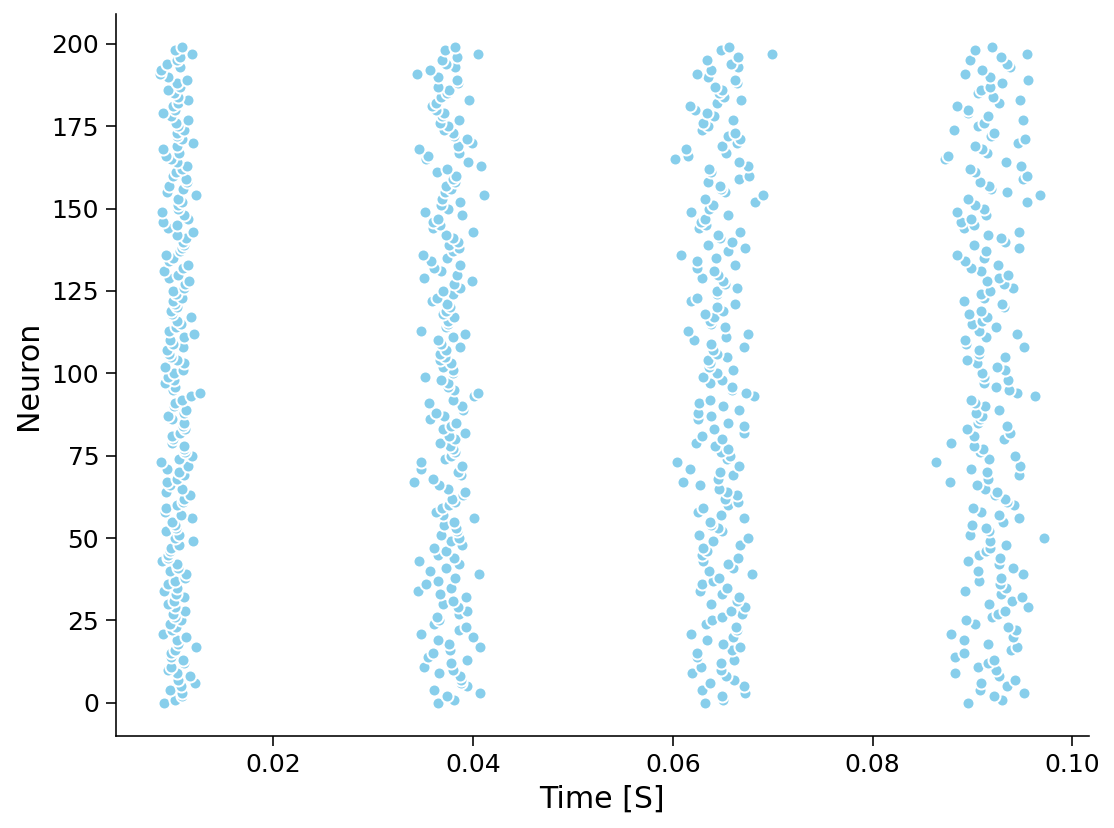

In [4]:
def make_raster_plot(N,t_range,sigma=0.1):
    """
    Computes the answer of N neurons to a random synaptic input current and plot the results as a raster plot
    
    Inputs : 
        N : Number of neurons
        t_range : Time-domain on which we want to investigate the neurons' responses
        sigma: Standard deviation of the noise of the input current 
    Outputs : 
        none
    """

    # Compute the responses of the neurons using the LIF function

    ######################
    ### your code here ###
    ######################


    dt = t_range[1]-t_range[0]
    neurons= {}
    for i in range(N):
        input_current = rand_syn(t_range,sigma)
        u,neurons[i] = LIF(input_current, t_range)
    # Represent these responses on a scatter plot

    ######################
    ### your code here ###
    ######################

    
    for i in range(N):
        spike_times = neurons[i]
        plt.scatter(spike_times, i*np.ones_like(spike_times),facecolor='skyblue',edgecolor = "white")
    plt.xlabel('Time [S]')
    plt.ylabel('Neuron')
    plt.show()
        
# Run the lines below to test your code


t_max = 100e-3   # second
dt = .1e-3        # second
t_range = np.arange(0,t_max,dt)
make_raster_plot(200,t_range,sigma=0.2)

**Investigate** the effect of the variance of the input current on the spike train regularities using the widget below.

In [5]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    sigma=widgets.FloatSlider(0.8, min=0, max=2, step=0.25, layout=my_layout)

)

def raster_plot(sigma = 0.8):
    t_max = 150e-3   # second
    dt = 1e-3        # second
    step_end = int(t_max / dt) - 1
    t_range = np.linspace(0,dt*step_end,step_end)
    input_current = rand_syn(t_range,dt, sigma)
    
    make_raster_plot(200,t_range,sigma)



interactive(children=(FloatSlider(value=0.8, description='sigma', layout=Layout(width='450px'), max=2.0, step=…

---

## Exercice 2a

Compute the firing rate using a rectangular kernel $ \kappa(t)= (\Delta t)^{-1} 1_{0 \leq t \leq \Delta t} $. $\rho(t)$ will therefore be the spike count in a sliding window of side $\Delta t = \text{width}$.

Hint: use the `convolve` function from numpy


Text(0, 0.5, 'Mean firing rate [Hz]')

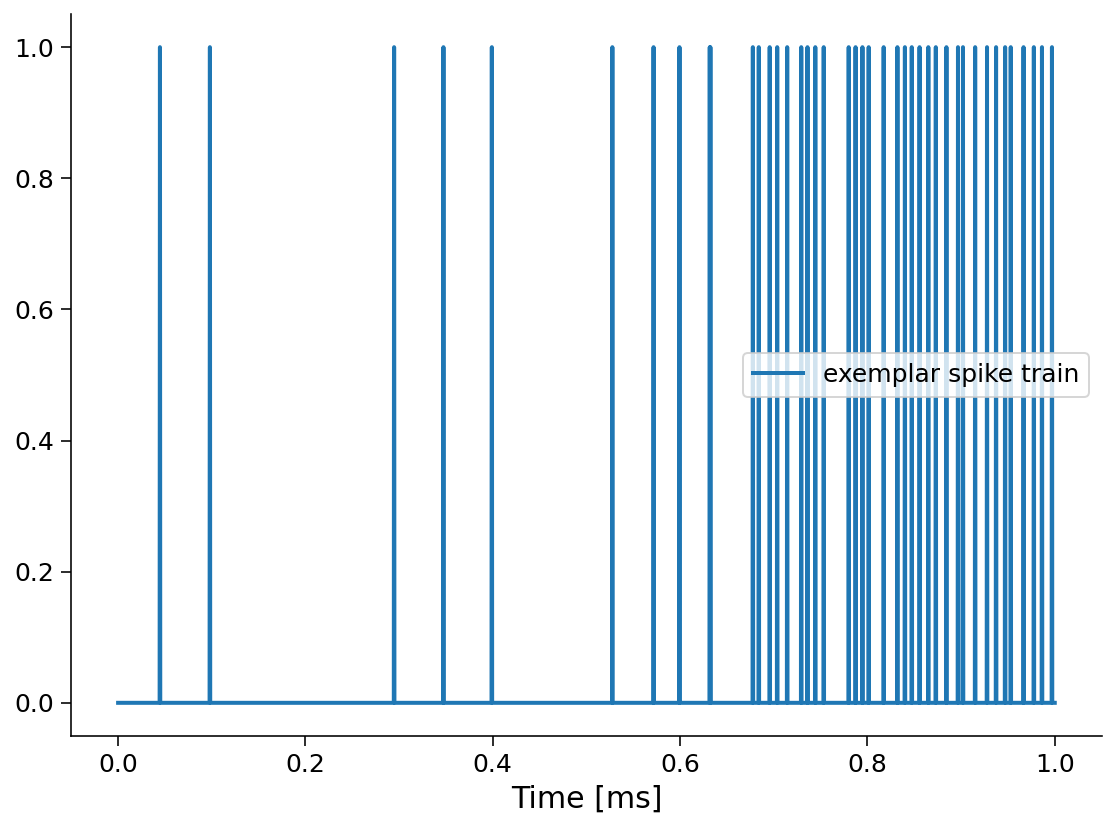

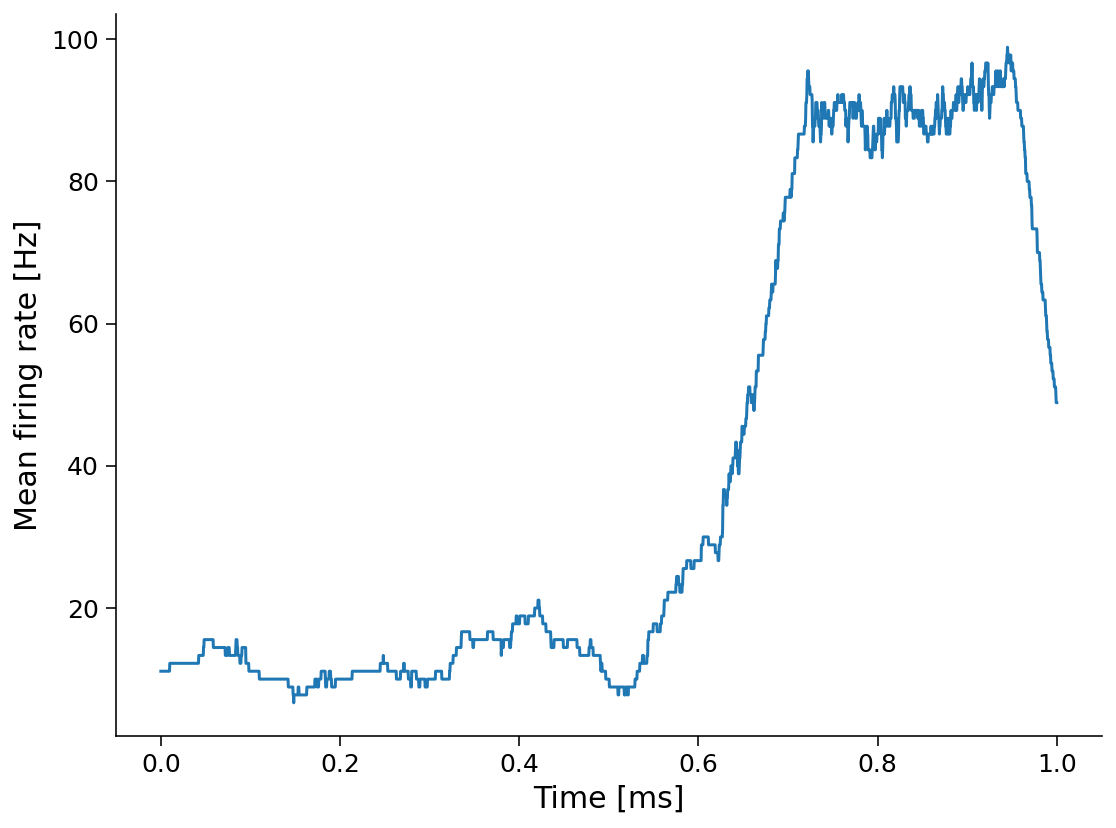

In [20]:
def firing_rate(S,kernel):
    """
    firing rate is a function that computes the firing rate from the spike trains and a given kernel

    Inputs : 
    -S (numpy array) is the spike train we want to compute the firing rate for
    -kernel (numpy array) is the kernel used for the convolution

    Outputs :
    -firing rate (numpy array) is the resulting firing rate 
    """

    firing_rate = np.convolve(S,kernel, mode='same')
    return firing_rate

def rect_kernel(width,dt):
    """
    rect_kernel creates the rectangular kernel used to compute the firing rate

    Inputs : 
    -time_vector is the time span on which we want to define this kernel
    -width is the width of the rectangular kernel (in the same units as time_vector)

    Outputs :
    -kernel is the returned rectangular kernel
    """
    width_dt = width/dt
    kernel = np.ones(int(width_dt))/width
    return kernel

# Run the lines below to test your code

# Data_loading
S, dt = load_dataset()
Firing_rate = np.zeros_like(S)

t_range = np.linspace(0,1,S.shape[1])
kernel = rect_kernel(100e-3,t_range[1]-t_range[0])
for ii in range(Firing_rate.shape[0]):
  Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)

mean_firing_rate = np.mean(Firing_rate,0)

fig, ax1 = plt.subplots()
#ax1.plot(t_range,kernel,label="kernel",LineWidth=2)
ax1.plot(t_range,S[1,:],label="exemplar spike train",LineWidth=2)
ax1.set_xlabel('Time [ms]')
ax1.legend()

fig, ax = plt.subplots()
ax.plot(t_range,mean_firing_rate)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Mean firing rate [Hz]")

In [18]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    width=widgets.FloatSlider(200, min=10, max=500, step=10, layout=my_layout)

)
def firingRate(width = 200):
    S ,dt = load_dataset()
    t_range = np.arange(0,1,S.shape[1])
    kernel = rect_kernel(t_range,width/1000)
    Firing_rate = np.zeros_like(S)
    for ii in range(Firing_rate.shape[0]):
      Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)
    fig, ax=plt.subplots()
    ax.plot(t_range,kernel)
    plt.show()

interactive(children=(FloatSlider(value=200.0, description='width', layout=Layout(width='450px'), max=500.0, m…

## Exercise 2b 

Compute the firing rate using a gaussian kernel defined by : 

$$
\begin{eqnarray}
\kappa(t) & =&  \dfrac{1}{\sigma\sqrt{2\pi}}\exp\left(-\dfrac{\left(t-t_f\right)^2}{2\sigma^2}\right)
\end{eqnarray}
$$

where the width of the convolution kernel is defined by the parameter $\sigma$. 

Text(0, 0.5, 'Mean firing rate [Hz]')

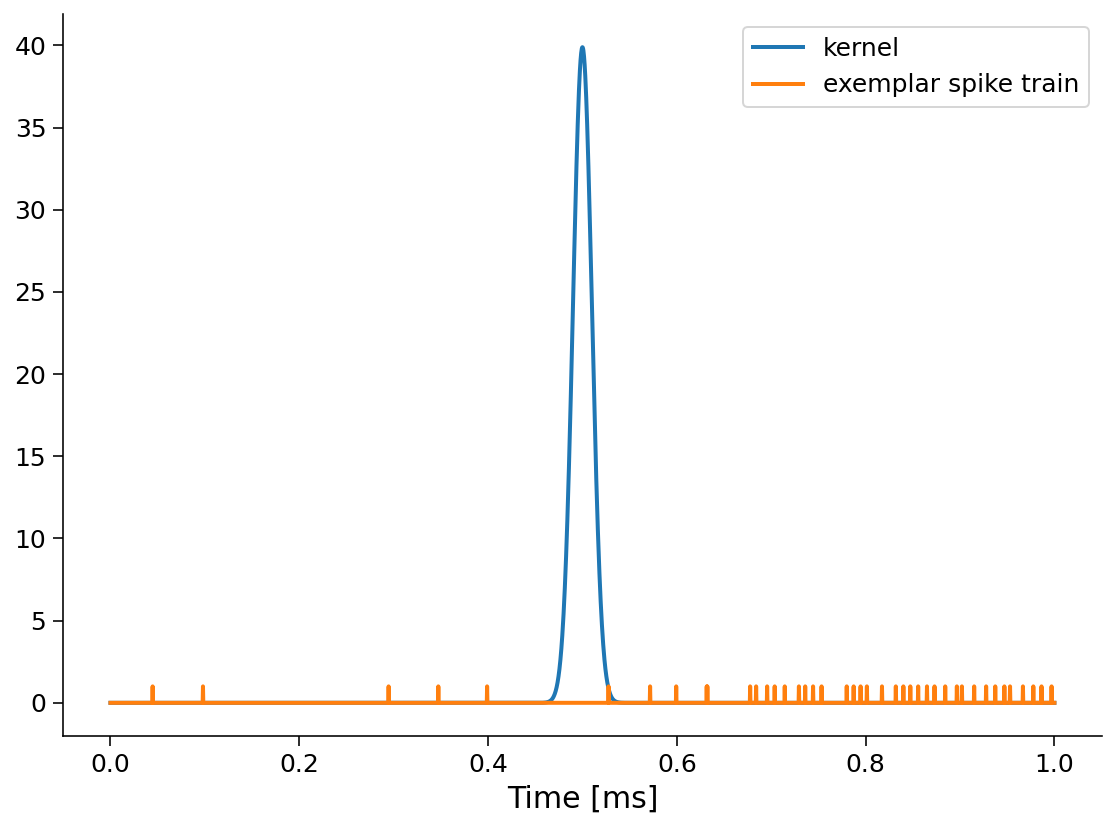

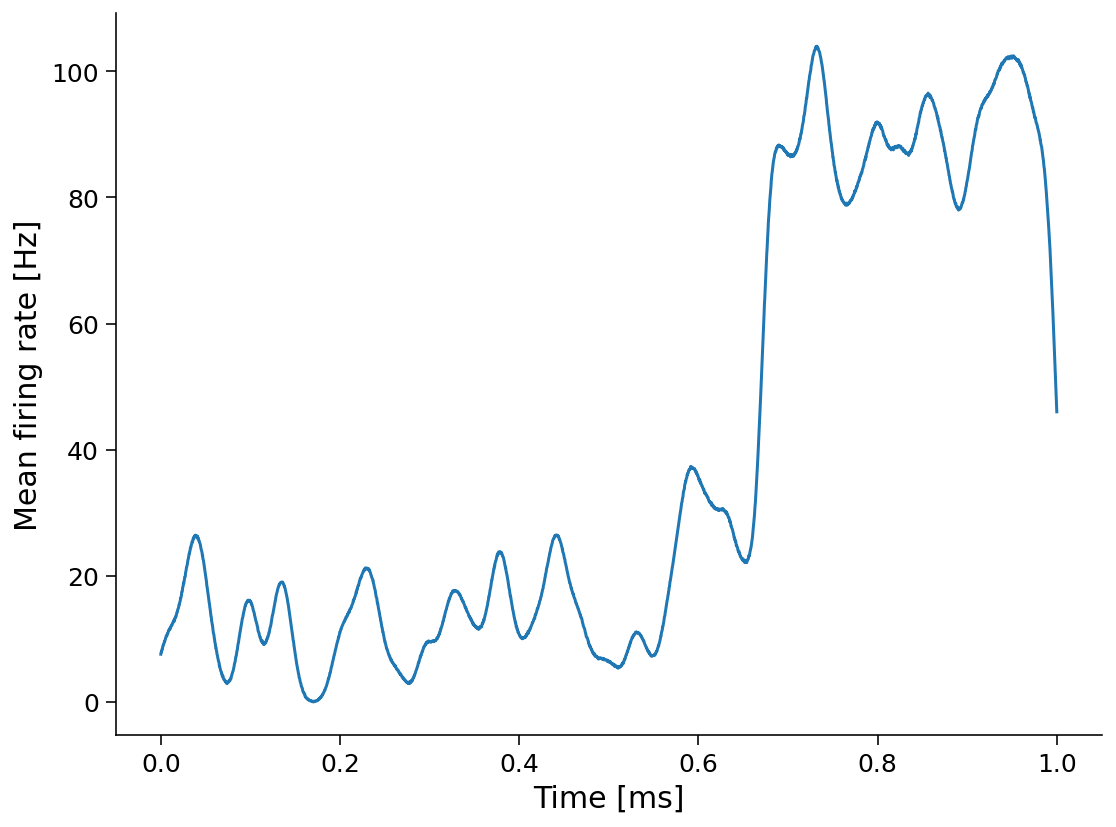

In [13]:
def gaussian_kernel(time_vector,sigma):
  """
  This function generates the gaussian kernel to compute the firing rate of a given spike trains

  Inputs : 
  -time_vector is the time span of the kernel
  -sigma is the width of the gaussian distribution

  Outputs:
  -kernel is the distribution
  """
  kernel = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-(time_vector-time_vector[-1]/2)**2/(2*sigma**2))
  return kernel

#Run the lines below to test your code


S, dt = load_dataset()
Firing_rate = np.zeros_like(S)

t_range = np.linspace(0,1,S.shape[1])
kernel = gaussian_kernel(t_range,0.01)
for ii in range(Firing_rate.shape[0]):
  Firing_rate[ii,:] = firing_rate(S[ii,:],kernel)

mean_firing_rate = np.mean(Firing_rate,0)

fig, ax1 = plt.subplots()
ax1.plot(t_range,kernel,label="kernel",LineWidth=2)
ax1.plot(t_range,S[1,:],label="exemplar spike train",LineWidth=2)
ax1.set_xlabel('Time [ms]')
ax1.legend()

fig, ax = plt.subplots()
ax.plot(t_range,mean_firing_rate)
ax.set_xlabel("Time [ms]")
ax.set_ylabel("Mean firing rate [Hz]")

#Exercise 2c [BONUS]

Implement an exponential kernel and compute the corresponding firing rate. The exponential kernel has assymetric rise and fall constants inspired from the biology. It is defined by the following : 

$$
\begin{eqnarray}
\kappa(t) = C \left(1-\exp\left(\dfrac{-t}{T_R}\right) \right) \exp\left(\dfrac{-t}{T_F}\right) 
\end{eqnarray}
$$

In [ ]:
TODO

---

## Exercise 3

In the first exercise, we observed that the firing rate increased with the amplitude of the input current. In this exercise, we will investigate this phenomenon and determine whether this relationship is linear or not.

In order to do that, use the functions you defined above to compute the firing rates of the neurons with varying input currents. 

Text(0, 0.5, 'Firing rate')

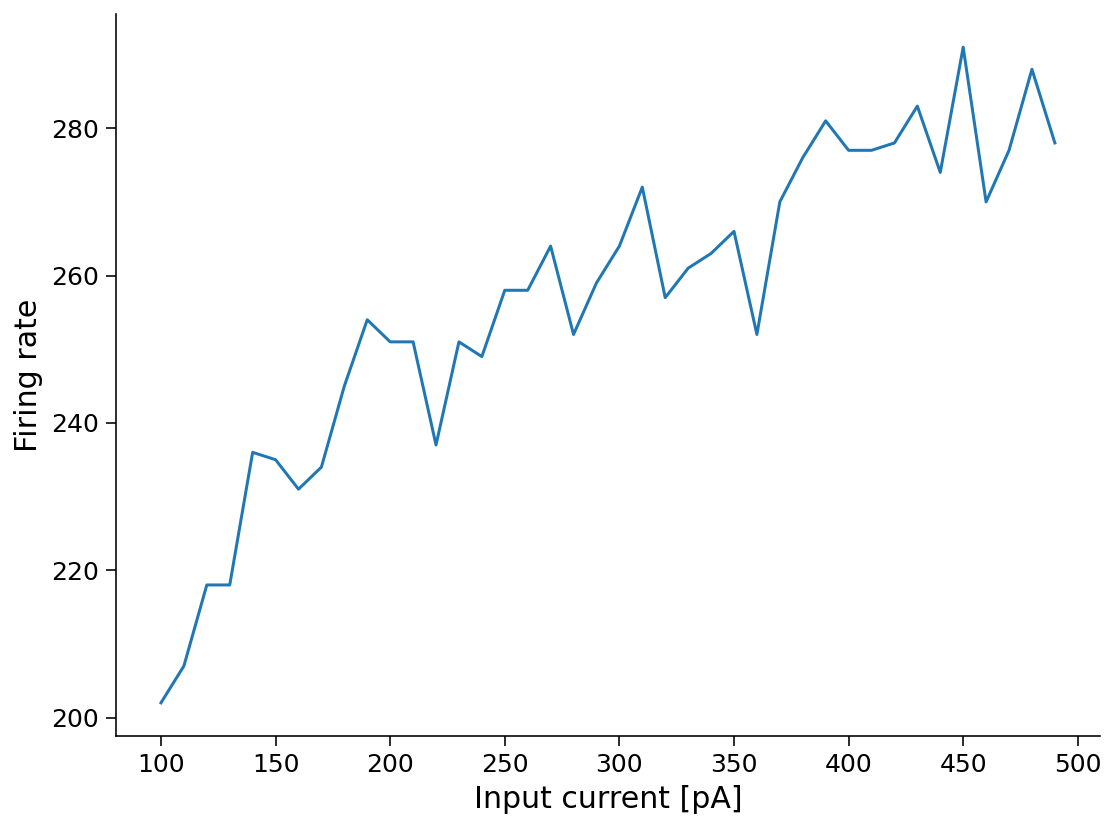

In [62]:
#we will use rec_kernel & firing_rate in this exercise 

#LEt's start by definin the potential input currents...
imin = 100
imax = 500
i_vector = np.arange(imin,imax,10)
niter = 20
kernel = rect_kernel(100e-3,1e-3)
fr_vector = np.zeros_like(i_vector)
count = 0
for i_input in i_vector:
    fr_buffer = np.zeros(niter)
    for iter in range(niter):
        input_current = rand_syn(t_range, sigma =10, imean = i_input*1e-12)
        S,ts = LIF(input_current, t_range)
        fr = firing_rate(ts,kernel)
        fr_buffer[iter] = np.mean(fr[int(len(fr)/2):int(3*len(fr)/4)])
    fr_vector[count] = np.mean(fr_buffer)
    count = count+1


#Run the lines below to test your code
fig, ax = plt.subplots()
ax.plot(i_vector,fr_vector)
ax.set_xlabel("Input current [pA]")
ax.set_ylabel("Firing rate")

**Answer the following questions**

* Is the relationship between input current amplitude and firing rate linear? 

* Could it be linear in some amplitude/variance range for the input current? 

* How could you verify/quantify this ? 

---
# Stochasticity of neuronal activity

In the last section, we saw how to compute the firing rate with different kernels and we observed that the way neurons convey information is by their spiking patterns. In this section, we will investigate the stochasticity of these spiking patterns. 

**Reminder**

Spike regularity can be quantified as the *coefficient of variation (CV) of the inter-spike-interval (ISI)*:
\begin{align}
\text{CV}_{\text{ISI}} = \dfrac{\text{std}(\text{ISI})}{\text{mean}(\text{ISI})}
\end{align}

The inter-spike-interval being the time elapsed between two successive spikes. 

---
## Exercise 4

Compute the inter-spike interval distribution as well as the coefficient of variation of spike trains provided in $S$ to assess the stochasticity of neuron's activity. Plot the ISI distribution with an histogram to visualize the spike regularity of the different neurons. 

Hint :

* You can use the function `np.diff`
* You can use the function `hist`from `matplotlib.pyplot`to represent the resulting distribution

A Poisson train is an example of high irregularity, in which $\textbf{CV}_{\textbf{ISI}} \textbf{= 1}$. And for a clocklike (regular) process we have $\textbf{CV}_{\textbf{ISI}} \textbf{= 0}$ because of **std(ISI)=0**.


Text(0, 0.5, 'Histogram of the ISI distribution')

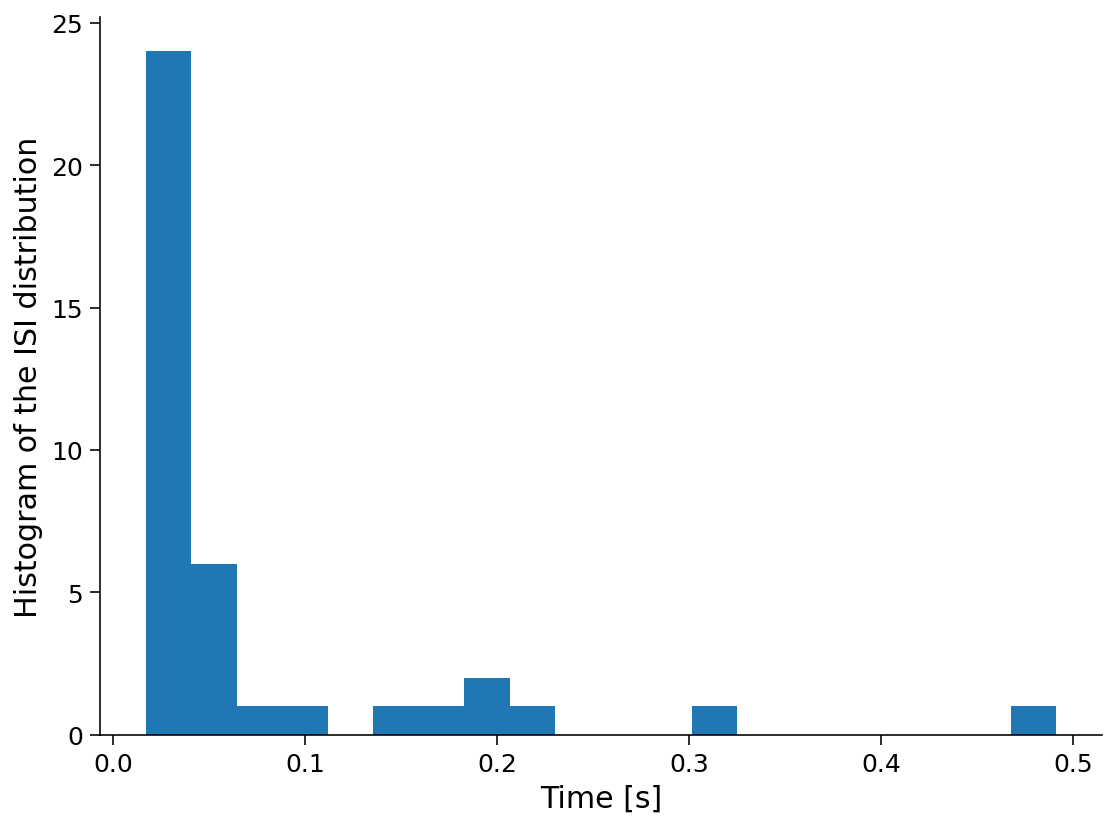

In [33]:
def compute_ISI(spiketrain,dt):
    """
    This function computes and plots the ISI distribution and returns the coefficient of variation and the interspike interval distribution

    Inputs : 
    -spiketrain is the spike pattern under investigation
    -dt is the time step

    Outputs :
    -CV is the coefficient of variation
    -ISI is the interspike interval distribution
    """
    ISI = np.diff((np.where(spiketrain))[0]*dt)
    CV = np.std(ISI)/np.mean(ISI)
    return ISI, CV
S,dt = load_dataset()
ISI,CV = compute_ISI(S[0,:],1e-3)
fig, ax=plt.subplots()
ax.hist(ISI,20)
ax.set_xlabel("ISI [s]")
ax.set_ylabel("Histogram of the ISI distribution")

In [34]:
# @title
# @markdown Make sure you execute this cell to enable the widget!
my_layout.width = '450px'
@widgets.interact(
    neuron=widgets.IntSlider(0, min=0, max=9, step=1, layout=my_layout)

)

def firingRate(neuron = 0):
        
    S,dt = load_dataset()
    ISI, CV=compute_ISI(S[neuron,:],dt)
    print("The CV for neuron", neuron, "is :", CV)
    fig, ax=plt.subplots()
    ax.hist(ISI,20)
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Histogram of the ISI distribution")

interactive(children=(IntSlider(value=0, description='neuron', layout=Layout(width='450px'), max=9), Output())…

---
#Exercise 5 

Variability in neuron's activity can be approximated by a Poisson process. In this case, the interspike interval distribution can be approximated by an exponential distribution. In the following exercise, create a Poisson type spike trains. 


**TODO** : Equations to generate poisson like process

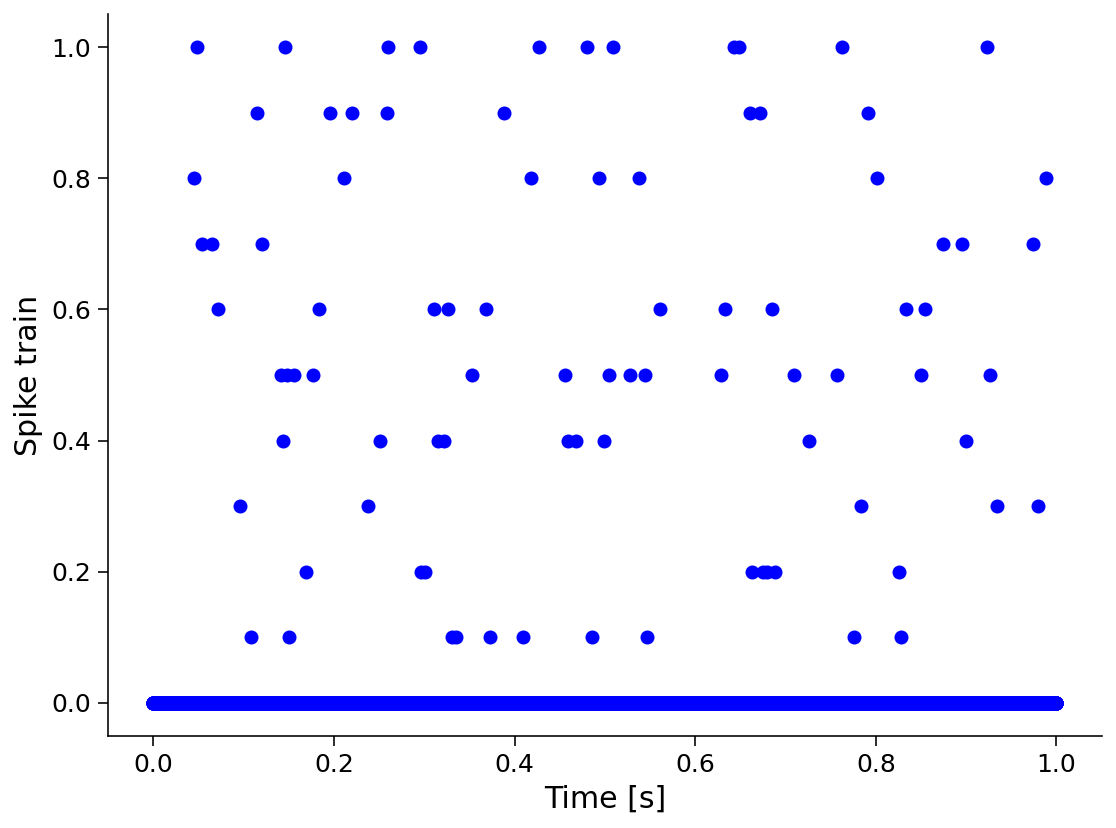

In [52]:
def Poisson_generator(time_range,n,rate):
    """
    Poisson generator generates n Poisson like spike trains

    Inputs : 
    -time_range is the time vector on which we are evolved
    -n is the number of spike trains to generate
    -rate is the rate of the poisson process

    Outputs:
    -poisson_trains are the generated poisson spike trains
    """

    dt = time_range[1]-time_range[0]
    L = len(time_range)

    u_rand = np.random.rand(n,L)
    poisson_train = 1.*(u_rand < rate * dt)
    return poisson_train

#Run the lines below to test your code

time_range = np.linspace(0,1,1000)
n = 10 
rate = 10
poisson_rate = Poisson_generator(time_range,n,rate)
fig, ax=plt.subplots()
ax.set_xlabel("Time [s]")
ax.set_ylabel("Spike train")
for ii in range(poisson_rate.shape[0]):
    ax=plt.scatter(time_range,(ii+1)/10 * poisson_rate[ii,:],c='blue')

---
##Exercise 6 - Inferring the firing rate from the spiking train

In the last exercise, we observed that the spiking patterns of neurons can be reproduced using a Poisson process (if CV~=1) . This means that, assuming that the neuron behave as a poisson process, it is possible to determine the firing rate. 

The idea is to estimate the firing rate based on Bayesian statistics. Imagine that you count a number of spikes $k$ during one second. The PSTH is equal to the spike count, so simply $k$ spikes. Now we could use Poisson model if the coefficient of variation is close to one (we have discussed it in the course). The probability that the number of spikes equal $k$ given a rate of $\rho$ is:
\begin{eqnarray*}
P(N = k | \rho) = \frac{e^{-\rho}\rho^k}{k!},
\end{eqnarray*}
to which we can apply Bayes' theorem to estimate $\rho$:
\begin{eqnarray*}
P(\rho| N = k ) &\propto& P(N = k | \rho) P(\rho),\\
P(\rho| N = k ) &\propto& \frac{e^{-\rho}\rho^k}{k!} P(\rho),
\end{eqnarray*}
where $P(\rho)$ expresses the prior. If we do not have any prior assumption we can use a flat, non-informative prior. Thus the posterior distribution can be approximated numerically by evaluating $P(N=k|\rho)$ for different vaules of $\rho$ and dividing by the sum so that it integrates to 1.

Apply this in the exercise below by completing the function `find_spikingrate`.

Text(0, 0.5, 'P(rho)')

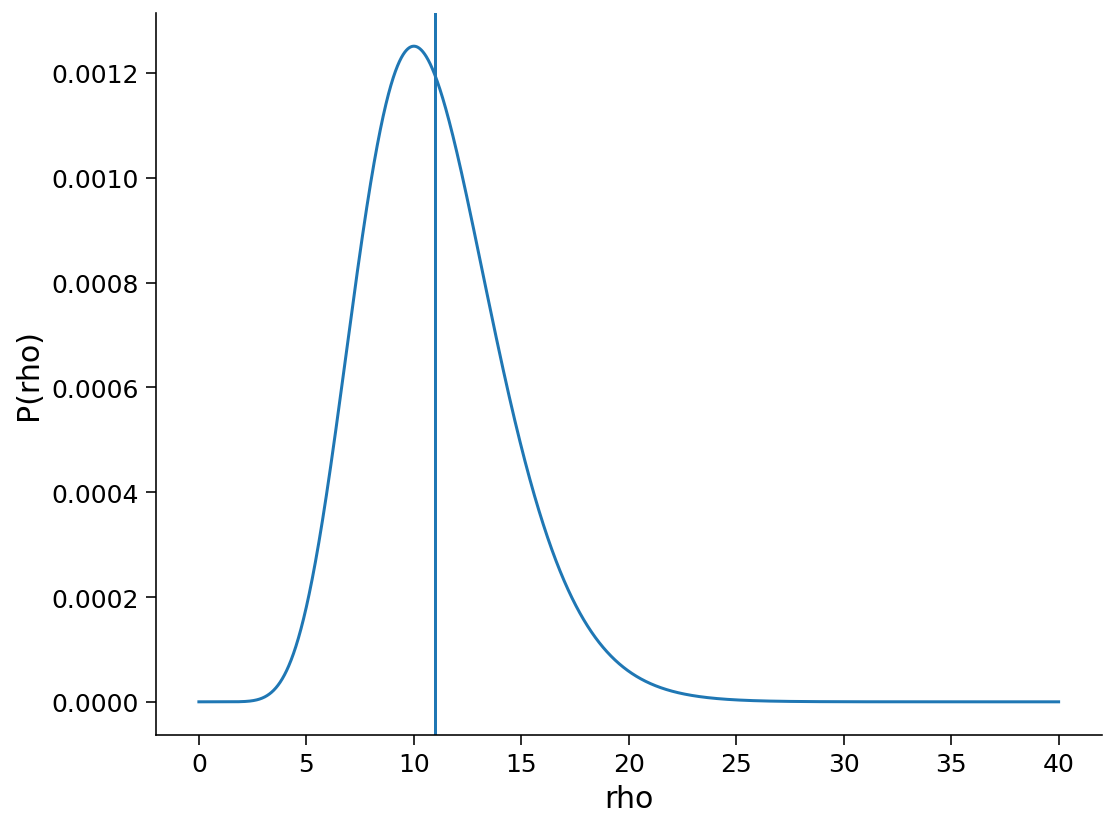

In [61]:
import numpy as np
import matplotlib.pyplot as plt
def find_spikingrate(k,rhocandidate,dt):
    """
    This function computes the best firing rate candidate based on the number of spikes observed per second

    Inputs : 
    -k is the number of spikes observed in dt seconds
    -rhocandidate is the set of rho we want to test
    -dt is the time during which the spikes are counted
    """
    posterior = np.exp(-rhocandidate*dt) * (rhocandidate*dt)**k / np.math.factorial(k)
    posterior = posterior/np.sum(posterior)
    expected_value = posterior@rhocandidate

    return posterior, expected_value

#Run the lines below to test your code 

k = 10
dt=1
rhocandidate = np.arange(0,40,0.01)
posterior, expected_value = find_spikingrate(k,rhocandidate,dt)
drho = rhocandidate[1]-rhocandidate[0]
fig, ax = plt.subplots()
ax.axvline(expected_value)
ax.plot(rhocandidate,posterior)
ax.set_xlabel('rho')
ax.set_ylabel('P(rho)')


##Exercise 7 - Tuning of neurons

**TODO** Example from Steinmetz data set (verify citations)